> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [no show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project collect a data of patiens in hospital and the data is about their appointments, diseases ,gender , neighborhood ,,scholarship and age. 
we study this dataset set and make some operations to answer some questions to help the hospital to improve its service

### Question(s) for Analysis 
>                             what is the factors affect the attendance of the patients 
>Does the age affect the attendance of the patients?
 Does the gender of the patients affect the attendance of the patients ?
 Does reciving (sms) from the hospital affect their attendance?
 does the type of the disease affect the attendance of the patients?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

## exploring dataset

   ## reading the dataset file 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### exploring dataset(small prief)

In [4]:

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### finding the number of rows and columns of the dataframe

In [5]:
df.shape

(110527, 14)

### finding if there is any rows with null values

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### check for duplicated rows

In [7]:

df.duplicated().sum()

0

### To know the actual number of patients 

In [8]:

df.PatientId.nunique()

62299

### check for patient who reserved more than one time.

In [9]:

df['PatientId'].duplicated().sum()

48228

### To know the number of patient with the same (no_show status) 

In [10]:

df.duplicated(['PatientId','No-show']).sum()

38710

### To see some descriptive statistics about the dataset 

In [11]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


### To see the number of rows with false data in age

In [12]:

mask=df.query('Age==-1')
mask


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### removing the row with false age (-1) from my dataframe

In [13]:

df.drop(index=99832,inplace=True)

### to check for removing the row from the previous step

In [14]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### remaning the columns with their correct names

In [15]:

df.rename(columns={'Hipertension':'hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## removing the rows of the patients that have the same repeated No-show status
### note  (the patients with different no_show status will not removed) 

In [16]:

df.drop_duplicates(['PatientId','No_show'],inplace=True)


### to make sure that the data have updated after the previous operation

In [17]:

df.shape
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No


### removing unnecessary columns from the dataset to be easily studied

In [18]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### cleaning data summary
> after removing the false values and and renaming the columns with their right names and removing duplicated rows and droping   unnecessary columns .
  the dataset will be ready to be explored by doing some analysing operations  

<a id='eda'></a>
## Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section


# what is the factors affecting the attendance ?



## General visualized look

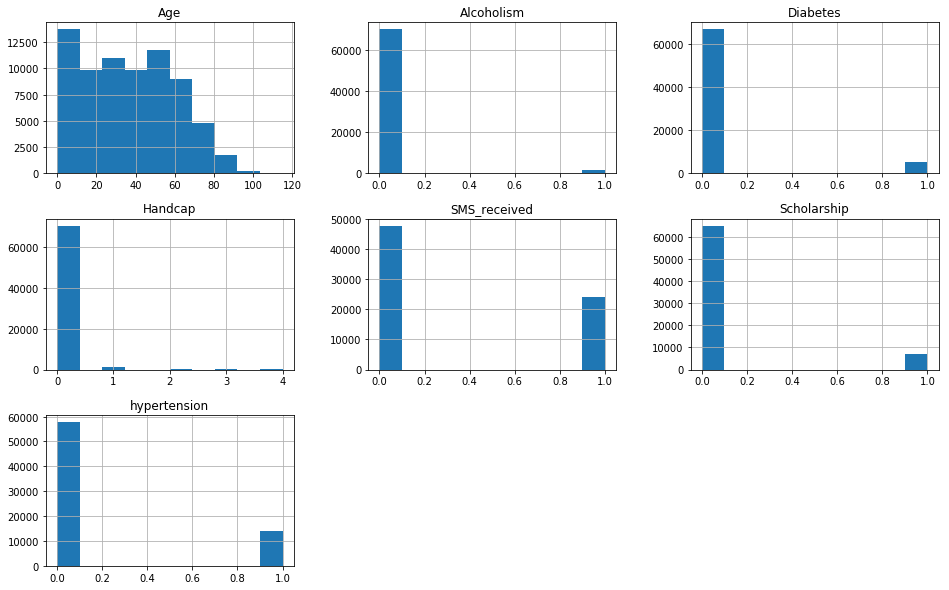

In [19]:
#quick  visualized review
df.hist(figsize=(16,10));
plt.legend();
plt.ylabel('number of patients');


### what is the ratio between the patients that show to the patients that no showed

In [20]:

show=df.No_show=='Yes'
noshow=df.No_show=='No'
df[show].count(),df[noshow].count()


(Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64, Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64)

### Does the age and disease affect the attendance ?

Text(0,0.5,'mean age')

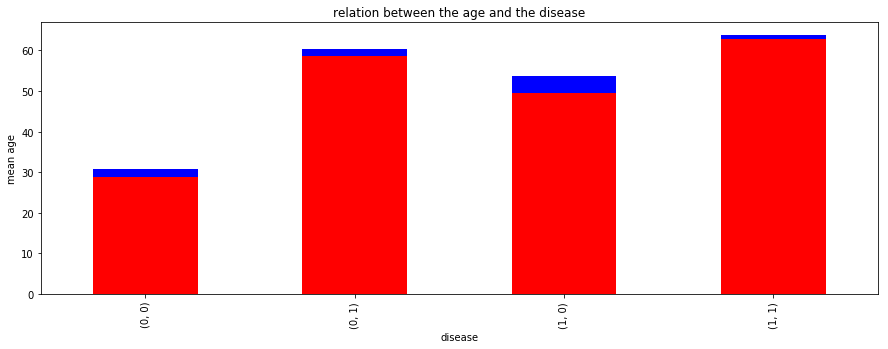

In [21]:

plt.figure(figsize=(15,5))
df[noshow].groupby(['Diabetes','hypertension']).mean()['Age'].plot(kind='bar',color='blue',label='noshow')
df[show].groupby(['Diabetes','hypertension']).mean()['Age'].plot(kind='bar',color='red',label='show')

plt.title('relation between the age and the disease')
plt.xlabel('disease')
plt.ylabel('mean age')

### Does the sex affect attendance ?

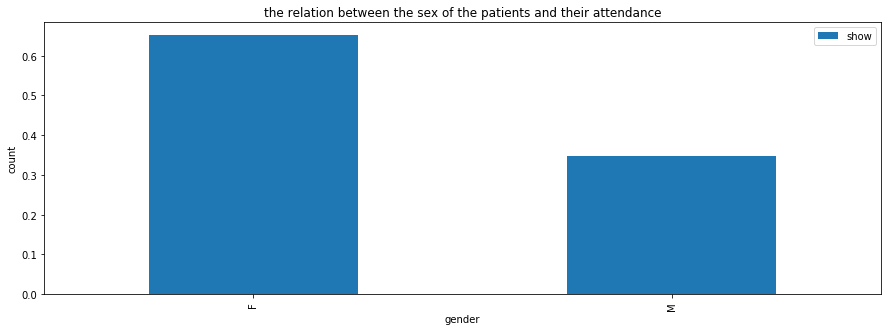

In [22]:

def attend(df,col,attend,no_attend):
    plt.figure(figsize=(15,5))
    df[col][show].value_counts(normalize=True).plot(kind='bar',label='show')
    plt.legend();
    plt.title('the relation between the sex of the patients and their attendance')
    plt.xlabel("gender")
    plt.ylabel('count')
attend(df,'Gender',show,noshow)    

### does the sex affect the non-showing?

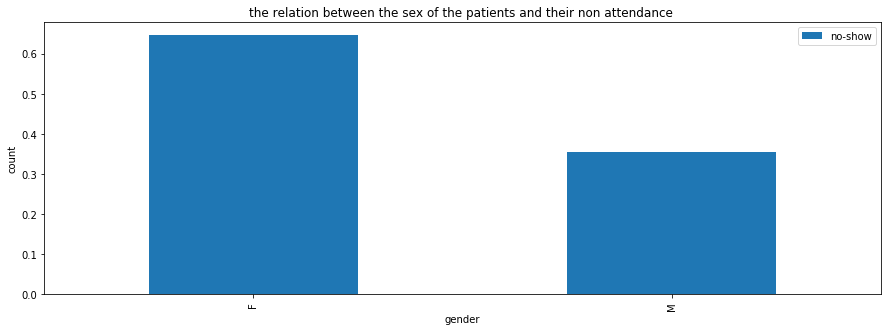

In [23]:

def attend(df,col,attend,no_attend):
    plt.figure(figsize=(15,5))
    df[col][noshow].value_counts(normalize=True).plot(kind='bar',label='no-show')
    plt.legend();
    plt.title('the relation between the sex of the patients and their non attendance ')
    plt.xlabel("gender")
    plt.ylabel('count')
attend(df,'Gender',show,noshow)  

###   does reciving sms affect the attendance ?

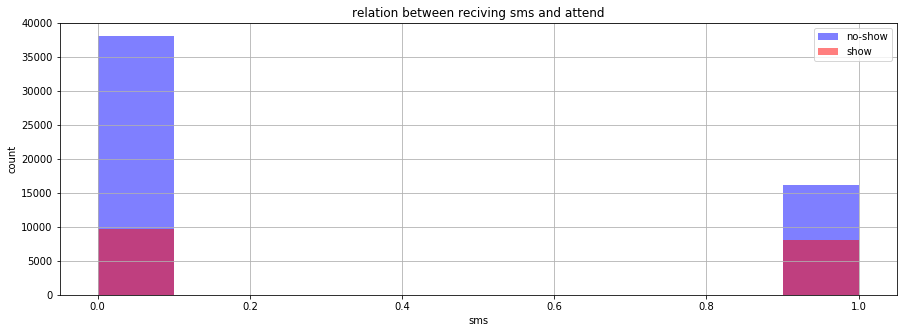

In [25]:

def attend(df,col,attend,noattend):
    plt.figure(figsize=(15,5))
    df[col][noshow].hist(alpha=0.5,bins=10,color='blue',label="no-show");
    df[col][show].hist(alpha=0.5,bins=10,color='red',label="show");
   
    plt.legend();
    plt.title('relation between reciving sms and attend')
    plt.xlabel('sms')
    plt.ylabel("count")
attend(df,'SMS_received',show,noshow)    

### reciving of sms doesnot  have a great effect to the attendance of the patients in total 

In [ ]:
plt.figure(figsize=(15,5))
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('average of patients recived sms in each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('count')

### does the Neighbourhood affect the attending of the patients ?

In [ ]:

plt.figure(figsize=(15,5))
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='blue',label='noshow')
df.Neighbourhood[show].value_counts().plot(kind='bar',color='red',label='show')

plt.legend();
plt.title('relation between the Neighbourhood and the attendance ')
plt.xlabel('Neighbourhood')
plt.ylabel('count')

Text(0,0.5,'count')

<a id='conclusions'></a>
## Conclusions

> Neighbourhoods have an effect on attendance of the patients than other Neighbourhoods
  (the number of attending in some  Neighbourhoods is more than others )

> the number of patients that recived an sms and doesnot attend is more than the patients that recived sms and attend 
which means that sms doesnot have a great effect on the attendance
 
 > the effectivness of (sms recived) differ form Neighbourhoods to other 
 


### Limitations
> there is no correlation between the gender of the patient and their attendance

>There is no correlation between the age and the type of disease



In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0